# Chapter 1: Pandas Foundations

## Recipes
* [Dissecting the anatomy of a DataFrame](#Dissecting-the-anatomy-of-a-DataFrame)
* [Accessing the main DataFrame components](#Accessing-the-main-DataFrame-components)
* [Understanding data types](#Understanding-data-types)
* [Selecting a single column of data as a Series](#Selecting-a-single-column-of-data-as-a-Series)
* [Calling Series methods](#Calling-Series-methods)
* [Working with operators on a Series](#Working-with-operators-on-a-Series)
* [Chaining Series methods together](#Chaining-Series-methods-together)
* [Making the index meaningful](#Making-the-index-meaningful)
* [Renaming row and column names](#Renaming-row-and-column-names)
* [Creating and deleting columns](#Creating-and-deleting-columns)

In [87]:
import pandas as pd
import numpy as np

# Dissecting the anatomy of a DataFrame

#### Change options to get specific output for book

In [88]:
pd.set_option('max_columns', 8, 'max_rows', 10)

In [95]:
re = pd.read_csv('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv', infer_datetime_format=True)
re.head()

,street,city,zip,state,...,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,...,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,...,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,...,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,...,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,...,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [96]:
re.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
              ...   
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
Length: 12, dtype: object

In [90]:
realestate = pd.read_csv('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv')
realestate.head()

,street,city,zip,state,...,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,...,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,...,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,...,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,...,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,...,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [91]:
realestate.info

<bound method DataFrame.info of                   street             city    zip state  ...  \
0           3526 HIGH ST       SACRAMENTO  95838    CA  ...   
1            51 OMAHA CT       SACRAMENTO  95823    CA  ...   
2         2796 BRANCH ST       SACRAMENTO  95815    CA  ...   
3       2805 JANETTE WAY       SACRAMENTO  95815    CA  ...   
4        6001 MCMAHON DR       SACRAMENTO  95824    CA  ...   
..                   ...              ...    ...   ...  ...   
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA  ...   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA  ...   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA  ...   
983     8304 RED FOX WAY        ELK GROVE  95758    CA  ...   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA  ...   

                        sale_date   price   latitude   longitude  
0    Wed May 21 00:00:00 EDT 2008   59222  38.631913 -121.434879  
1    Wed May 21 00:00:00 EDT 2008   68212  38.478902 -121.431028  
2    Wed M

In [94]:
realestate.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
              ...   
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
Length: 12, dtype: object

In [93]:
realestate.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [97]:
movie = pd.read_csv('data/movie.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0


![dataframe anatomy](./images/ch01_dataframe_anatomy.png)

# Accessing the main DataFrame components

In [98]:
columns = movie.columns
index = movie.index
data = movie.values

In [99]:
columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [100]:
index

RangeIndex(start=0, stop=4916, step=1)

In [101]:
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

In [102]:
type(index)

pandas.core.indexes.range.RangeIndex

In [103]:
type(columns)

pandas.core.indexes.base.Index

In [104]:
type(data)

numpy.ndarray

In [105]:
issubclass(pd.RangeIndex, pd.Index)

True

## There's more

In [12]:
index.values

array([   0,    1,    2, ..., 4913, 4914, 4915], dtype=int64)

In [13]:
columns.values

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

# Understanding data types

In [14]:
movie = pd.read_csv('data/movie.csv')

In [106]:
movie.dtypes

color                       object
director_name               object
num_critic_for_reviews     float64
duration                   float64
director_facebook_likes    float64
                            ...   
title_year                 float64
actor_2_facebook_likes     float64
imdb_score                 float64
aspect_ratio               float64
movie_facebook_likes         int64
Length: 28, dtype: object

In [107]:
movie.get_dtype_counts()

float64    13
int64       3
object     12
dtype: int64

# Selecting a single column of data as a Series

In [17]:
movie = pd.read_csv('data/movie.csv')

In [108]:
movie['director_name']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [109]:
type(movie['director_name'])

pandas.core.series.Series

In [110]:
# alternative syntax 
# recommendation not to use this as there could be potential naming conflicts
movie.director_name

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [20]:
type(movie['director_name'])

pandas.core.series.Series

## There's more

In [111]:
director = movie['director_name'] # save Series to variable
director.name

'director_name'

In [22]:
# create a one dimensional data from a series
# useful if you need some dataframe specific method
director.to_frame().head()

,director_name
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Doug Walker


# Calling Series methods

## Getting ready...

In [112]:
dir(pd.Series)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

In [119]:
dir("mystr")

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [113]:
s_attr_methods = set(dir(pd.Series))
len(s_attr_methods)

471

In [120]:
underscore = [el for el in s_attr_methods if el[0] == '_']
underscore[:10]

['__dict__',
 '__div__',
 '__ifloordiv__',
 '__deepcopy__',
 '_typ',
 '_check_setitem_copy',
 '_indexed_same',
 '_add_series_only_operations',
 '_AXIS_IALIASES',
 '_can_hold_na']

In [121]:
type(director)

pandas.core.series.Series

In [123]:
director._typ

'series'

In [124]:
director._typ = "Broken Series"

In [125]:
type(director)

pandas.core.series.Series

In [114]:
df_attr_methods = set(dir(pd.DataFrame))
len(df_attr_methods)

458

In [115]:
len(s_attr_methods & df_attr_methods)

400

In [116]:
len(df_attr_methods - s_attr_methods)

58

In [117]:
# get unique methods for dataframe , those that are not used by series
df_attr_methods - s_attr_methods

{'_agg_summary_and_see_also_doc',
 '_box_col_values',
 '_combine_const',
 '_combine_frame',
 '_combine_match_columns',
 '_combine_match_index',
 '_count_level',
 '_ensure_valid_index',
 '_from_arrays',
 '_get_agg_axis',
 '_getitem_bool_array',
 '_getitem_frame',
 '_getitem_multilevel',
 '_info_repr',
 '_join_compat',
 '_reindex_columns',
 '_reindex_index',
 '_repr_fits_horizontal_',
 '_repr_fits_vertical_',
 '_repr_html_',
 '_sanitize_column',
 '_series',
 '_setitem_array',
 '_setitem_frame',
 '_setitem_slice',
 '_unpickle_frame_compat',
 '_unpickle_matrix_compat',
 'applymap',
 'assign',
 'boxplot',
 'columns',
 'corrwith',
 'eval',
 'from_dict',
 'from_items',
 'from_records',
 'info',
 'insert',
 'iterrows',
 'itertuples',
 'join',
 'lookup',
 'melt',
 'merge',
 'pivot',
 'pivot_table',
 'query',
 'select_dtypes',
 'set_index',
 'stack',
 'style',
 'to_feather',
 'to_gbq',
 'to_html',
 'to_panel',
 'to_parquet',
 'to_records',
 'to_stata'}

In [118]:
#list of all dataframe methods that are meant for human consumption
humanmethods = [el for el in list(df_attr_methods - s_attr_methods) if el[0] != '_']
humanmethods

['pivot_table',
 'itertuples',
 'insert',
 'to_html',
 'to_parquet',
 'select_dtypes',
 'stack',
 'to_gbq',
 'iterrows',
 'merge',
 'melt',
 'columns',
 'lookup',
 'info',
 'boxplot',
 'to_panel',
 'pivot',
 'join',
 'style',
 'to_feather',
 'from_records',
 'to_stata',
 'corrwith',
 'applymap',
 'query',
 'eval',
 'from_items',
 'set_index',
 'from_dict',
 'assign',
 'to_records']

## How to do it...

In [126]:
movie = pd.read_csv('data/movie.csv')
director = movie['director_name']
actor_1_fb_likes = movie['actor_1_facebook_likes']

In [127]:
director.head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object

In [28]:
actor_1_fb_likes.head()

0     1000.0
1    40000.0
2    11000.0
3    27000.0
4      131.0
Name: actor_1_facebook_likes, dtype: float64

In [138]:
# setting up maximum row display
pd.set_option('max_rows', 21)

In [131]:

director.value_counts()[:30]

Steven Spielberg      26
Woody Allen           22
Clint Eastwood        20
Martin Scorsese       20
                      ..
Stephen Frears        10
Paul W.S. Anderson    10
Bobby Farrelly        10
Wes Craven            10
Name: director_name, Length: 30, dtype: int64

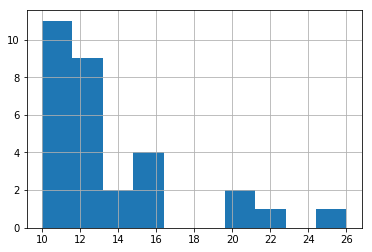

In [132]:
director.value_counts()[:30].hist()

In [129]:
director.hist()

KeyboardInterrupt: 

In [133]:
len(director)

4916

In [134]:
actor_1_fb_likes.value_counts()

1000.0     436
11000.0    206
2000.0     189
3000.0     150
          ... 
216.0        1
859.0        1
225.0        1
334.0        1
Name: actor_1_facebook_likes, Length: 877, dtype: int64

In [135]:
actor_1_fb_likes.quantile([0.1,0.5,0.9])

0.1      240.0
0.5      982.0
0.9    18000.0
Name: actor_1_facebook_likes, dtype: float64

In [139]:
actor_1_fb_likes.quantile([el/20 for el in range(21)])

0.00         0.0
0.05        93.0
0.10       240.0
0.15       398.2
0.20       510.0
0.25       607.0
0.30       694.0
0.35       782.0
0.40       854.0
0.45       925.0
0.50       982.0
0.55      1000.0
0.60      1000.0
0.65      3000.0
0.70      8000.0
0.75     11000.0
0.80     13000.0
0.85     15000.0
0.90     18000.0
0.95     23000.0
1.00    640000.0
Name: actor_1_facebook_likes, dtype: float64

In [140]:
director.size

4916

In [141]:
director.shape

(4916,)

In [33]:
len(director)

4916

In [142]:
director.count()

4814

In [143]:
actor_1_fb_likes.count()

4909

In [144]:
# default quantile is given as 0.5 that is half or median
actor_1_fb_likes.quantile()

982.0

In [145]:
actor_1_fb_likes.median()

982.0

In [146]:
actor_1_fb_likes.min(), actor_1_fb_likes.max(), \
actor_1_fb_likes.mean(), actor_1_fb_likes.median(), \
actor_1_fb_likes.std(), actor_1_fb_likes.sum()

(0.0, 640000.0, 6494.488490527602, 982.0, 15106.986883848309, 31881444.0)

In [147]:
# describe works a bit differently on quantitative date as opposed to textual data
actor_1_fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [148]:
director.describe()

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

In [40]:
actor_1_fb_likes.quantile(.2)

510.0

In [41]:
actor_1_fb_likes.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1      240.0
0.2      510.0
0.3      694.0
0.4      854.0
        ...   
0.6     1000.0
0.7     8000.0
0.8    13000.0
0.9    18000.0
Name: actor_1_facebook_likes, Length: 9, dtype: float64

In [149]:
director.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
        ...  
4906    False
4907    False
4908    False
4909    False
4910    False
4911    False
4912     True
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

In [150]:
actor_1_fb_likes_filled = actor_1_fb_likes.fillna(0)
actor_1_fb_likes_filled.count()

4916

In [151]:
actor_1_fb_likes_dropped = actor_1_fb_likes.dropna()
actor_1_fb_likes_dropped.size

4909

## There's more...

In [45]:
director.value_counts(normalize=True)

Steven Spielberg      0.005401
Woody Allen           0.004570
Clint Eastwood        0.004155
Martin Scorsese       0.004155
                        ...   
Alex van Warmerdam    0.000208
Michael McGowan       0.000208
Vivek Agnihotri       0.000208
Jonathan Wacks        0.000208
Name: director_name, Length: 2397, dtype: float64

In [152]:
director.value_counts(normalize=True).sum()

1.0

In [46]:
director.hasnans

True

In [47]:
director.notnull()

0        True
1        True
2        True
3        True
        ...  
4912    False
4913     True
4914     True
4915     True
Name: director_name, Length: 4916, dtype: bool

# Working with operators on a Series

In [48]:
pd.options.display.max_rows = 6

In [49]:
5 + 9    # plus operator example. Adds 5 and 9

14

In [50]:
4 ** 2   # exponentiation operator. Raises 4 to the second power

16

In [51]:
a = 10   # assignment operator.

In [52]:
5 <= 9   # less than or equal to operator

True

In [53]:
'abcde' + 'fg'    # plus operator for strings. C

'abcdefg'

In [54]:
not (5 <= 9)      # not is an operator that is a reserved keyword and reverse a boolean

False

In [55]:
7 in [1, 2, 6]    # in operator checks for membership of a list

False

In [56]:
set([1,2,3]) & set([2,3,4])

{2, 3}

In [57]:
[1, 2, 3] - 3

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [58]:
a = set([1,2,3])     
a[0]                 # the indexing operator does not work with sets

TypeError: 'set' object does not support indexing

## Getting ready...

In [153]:
movie = pd.read_csv('data/movie.csv')
imdb_score = movie['imdb_score']
imdb_score

0       7.9
1       7.1
2       6.8
3       8.5
4       7.1
5       6.6
6       6.2
7       7.8
8       7.5
9       7.5
       ... 
4906    7.0
4907    6.3
4908    6.9
4909    7.8
4910    6.4
4911    7.7
4912    7.5
4913    6.3
4914    6.3
4915    6.6
Name: imdb_score, Length: 4916, dtype: float64

In [154]:
imdb_score + 1

0       8.9
1       8.1
2       7.8
3       9.5
4       8.1
5       7.6
6       7.2
7       8.8
8       8.5
9       8.5
       ... 
4906    8.0
4907    7.3
4908    7.9
4909    8.8
4910    7.4
4911    8.7
4912    8.5
4913    7.3
4914    7.3
4915    7.6
Name: imdb_score, Length: 4916, dtype: float64

In [61]:
imdb_score * 2.5

0       19.75
1       17.75
2       17.00
        ...  
4913    15.75
4914    15.75
4915    16.50
Name: imdb_score, Length: 4916, dtype: float64

In [62]:
imdb_score // 7

0       1.0
1       1.0
2       0.0
       ... 
4913    0.0
4914    0.0
4915    0.0
Name: imdb_score, Length: 4916, dtype: float64

In [155]:
imdb_score > 7

0        True
1        True
2       False
3        True
4        True
5       False
6       False
7        True
8        True
9        True
        ...  
4906    False
4907    False
4908    False
4909     True
4910    False
4911     True
4912     True
4913    False
4914    False
4915    False
Name: imdb_score, Length: 4916, dtype: bool

In [64]:
director = movie['director_name']

In [65]:
director == 'James Cameron'

0        True
1       False
2       False
        ...  
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

## There's more...

In [66]:
imdb_score.add(1)              # imdb_score + 1

0       8.9
1       8.1
2       7.8
       ... 
4913    7.3
4914    7.3
4915    7.6
Name: imdb_score, Length: 4916, dtype: float64

In [67]:
imdb_score.mul(2.5)            # imdb_score * 2.5

0       19.75
1       17.75
2       17.00
        ...  
4913    15.75
4914    15.75
4915    16.50
Name: imdb_score, Length: 4916, dtype: float64

In [68]:
imdb_score.floordiv(7)         # imdb_score // 7

0       1.0
1       1.0
2       0.0
       ... 
4913    0.0
4914    0.0
4915    0.0
Name: imdb_score, Length: 4916, dtype: float64

In [49]:
imdb_score.gt(7)               # imdb_score > 7

0        True
1        True
2       False
3        True
        ...  
4912     True
4913    False
4914    False
4915    False
Name: imdb_score, Length: 4916, dtype: bool

In [50]:
director.eq('James Cameron')   # director == 'James Cameron'

0        True
1       False
2       False
3       False
        ...  
4912    False
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

In [71]:
imdb_score.astype(int).mod(5)

0       2
1       2
2       1
       ..
4913    1
4914    1
4915    1
Name: imdb_score, Length: 4916, dtype: int64

In [72]:
a = type(1)

In [73]:
type(a)

type

In [74]:
a = type(imdb_score)

In [75]:
a([1,2,3])

0    1
1    2
2    3
dtype: int64

# Chaining Series methods together

In [156]:
movie = pd.read_csv('data/movie.csv')
actor_1_fb_likes = movie['actor_1_facebook_likes']
director = movie['director_name']

In [157]:
director.value_counts().head(3)

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Name: director_name, dtype: int64

In [158]:
actor_1_fb_likes.isnull().sum()

7

In [54]:
actor_1_fb_likes.dtype

dtype('float64')

In [159]:
actor_1_fb_likes.fillna(0)\
                .astype(int)\
                .head()

0     1000
1    40000
2    11000
3    27000
4      131
Name: actor_1_facebook_likes, dtype: int32

## There's more...

In [57]:
actor_1_fb_likes.isnull()

0       False
1       False
2       False
3       False
        ...  
4912    False
4913    False
4914    False
4915    False
Name: actor_1_facebook_likes, Length: 4916, dtype: bool

In [160]:
# here we find what percentage of actor 1 likes are null
actor_1_fb_likes.isnull().mean()*100

0.14239218877135884

In [82]:
(actor_1_fb_likes.fillna(0)
                 .astype(int)
                 .head())

0     1000
1    40000
2    11000
3    27000
4      131
Name: actor_1_facebook_likes, dtype: int64

# Making the index meaningful

In [58]:
movie = pd.read_csv('data/movie.csv')

In [161]:
movie.shape

(4916, 28)

In [162]:
movie2 = movie.set_index('movie_title')
movie2

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0
John Carter,Color,Andrew Stanton,462.0,132.0,...,632.0,6.6,2.35,24000
Spider-Man 3,Color,Sam Raimi,392.0,156.0,...,11000.0,6.2,2.35,0
Tangled,Color,Nathan Greno,324.0,100.0,...,553.0,7.8,1.85,29000
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,...,21000.0,7.5,2.35,118000


In [168]:
# when you know exact name of row and column
movie2.loc['Avatar','director_name']

'James Cameron'

In [170]:
#when you know exact row and column number
movie2.iloc[0,1]

'James Cameron'

In [172]:
# find all movies where the director is James Cameron
cameronmovies = movie2[movie2['director_name'] == 'James Cameron']
cameronmovies

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Titanic,Color,James Cameron,315.0,194.0,...,14000.0,7.7,2.35,26000
Terminator 2: Judgment Day,Color,James Cameron,210.0,153.0,...,604.0,8.5,2.35,13000
True Lies,Color,James Cameron,94.0,141.0,...,1000.0,7.2,2.35,0
The Abyss,Color,James Cameron,82.0,171.0,...,650.0,7.6,2.35,0
Aliens,Color,James Cameron,250.0,154.0,...,626.0,8.4,1.85,18000
The Terminator,Color,James Cameron,204.0,107.0,...,663.0,8.1,1.85,13000


In [45]:
director.value_counts(normalize=True)

Steven Spielberg      0.005401
Woody Allen           0.004570
Clint Eastwood        0.004155
Martin Scorsese       0.004155
                        ...   
Alex van Warmerdam    0.000208
Michael McGowan       0.000208
Vivek Agnihotri       0.000208
Jonathan Wacks        0.000208
Name: director_name, Length: 2397, dtype: float64

In [173]:
# create index from a column immediately when reading
pd.read_csv('data/movie.csv', index_col='movie_title')

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0
John Carter,Color,Andrew Stanton,462.0,132.0,...,632.0,6.6,2.35,24000
Spider-Man 3,Color,Sam Raimi,392.0,156.0,...,11000.0,6.2,2.35,0
Tangled,Color,Nathan Greno,324.0,100.0,...,553.0,7.8,1.85,29000
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,...,21000.0,7.5,2.35,118000


# There's more...

In [174]:
movie2.reset_index()

,movie_title,color,director_name,num_critic_for_reviews,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Avatar,Color,James Cameron,723.0,...,936.0,7.9,1.78,33000
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,...,5000.0,7.1,2.35,0
2,Spectre,Color,Sam Mendes,602.0,...,393.0,6.8,2.35,85000
3,The Dark Knight Rises,Color,Christopher Nolan,813.0,...,23000.0,8.5,2.35,164000
4,Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,...,12.0,7.1,NaN,0
5,John Carter,Color,Andrew Stanton,462.0,...,632.0,6.6,2.35,24000
6,Spider-Man 3,Color,Sam Raimi,392.0,...,11000.0,6.2,2.35,0
7,Tangled,Color,Nathan Greno,324.0,...,553.0,7.8,1.85,29000
8,Avengers: Age of Ultron,Color,Joss Whedon,635.0,...,21000.0,7.5,2.35,118000
9,Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,...,11000.0,7.5,2.35,10000


# Renaming row and column names

In [175]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [176]:
idx_rename = {'Avatar':'Ratava', 'Spectre': 'Ertceps'} 
col_rename = {'director_name':'Director Name', 
              'num_critic_for_reviews': 'Critical Reviews'} 

In [177]:
movie.rename(index=idx_rename, 
             columns=col_rename).head()

,color,Director Name,Critical Reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,
Ratava,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Ertceps,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0


# There's more

In [66]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
index = movie.index
columns = movie.columns

index_list = index.tolist()
column_list = columns.tolist()

index_list[0] = 'Ratava'
index_list[2] = 'Ertceps'
column_list[1] = 'Director Name'
column_list[2] = 'Critical Reviews'

In [67]:
print(index_list[:5])

['Ratava', "Pirates of the Caribbean: At World's End", 'Ertceps', 'The Dark Knight Rises', 'Star Wars: Episode VII - The Force Awakens']


In [68]:
print(column_list)

['color', 'Director Name', 'Critical Reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [69]:
movie.index = index_list
movie.columns = column_list

In [95]:
movie.head()

,color,Director Name,Critical Reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Ratava,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Ertceps,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0


# Creating and deleting columns

In [178]:
movie = pd.read_csv('data/movie.csv')

In [179]:
movie['has_seen'] = 0

In [72]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'has_seen'],
      dtype='object')

In [180]:
# create a new column aggregrating (summing) all actor FB likes for each movie
movie['actor_director_facebook_likes'] = (movie['actor_1_facebook_likes'] + 
                                              movie['actor_2_facebook_likes'] + 
                                              movie['actor_3_facebook_likes'] + 
                                              movie['director_facebook_likes'])

In [181]:
movie['actor_director_facebook_likes'].isnull().sum()

122

In [75]:
movie['actor_director_facebook_likes'] = movie['actor_director_facebook_likes'].fillna(0)

In [182]:
movie['is_cast_likes_more'] = (movie['cast_total_facebook_likes'] >= 
                                  movie['actor_director_facebook_likes'])

In [183]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,...,movie_facebook_likes,has_seen,actor_director_facebook_likes,is_cast_likes_more
0,Color,James Cameron,723.0,178.0,...,33000,0,2791.0,True
1,Color,Gore Verbinski,302.0,169.0,...,0,0,46563.0,True
2,Color,Sam Mendes,602.0,148.0,...,85000,0,11554.0,True
3,Color,Christopher Nolan,813.0,164.0,...,164000,0,95000.0,True
4,NaN,Doug Walker,NaN,NaN,...,0,0,NaN,False


In [77]:
movie['is_cast_likes_more'].all()

False

In [78]:
movie = movie.drop('actor_director_facebook_likes', axis='columns')

In [184]:
movie['actor_total_facebook_likes'] = (movie['actor_1_facebook_likes'] + 
                                       movie['actor_2_facebook_likes'] + 
                                       movie['actor_3_facebook_likes'])

movie['actor_total_facebook_likes'] = movie['actor_total_facebook_likes'].fillna(0)

In [185]:
movie['is_cast_likes_more'] = movie['cast_total_facebook_likes'] >= \
                                  movie['actor_total_facebook_likes']
    
movie['is_cast_likes_more'].all()

True

In [186]:
movie['pct_actor_cast_like'] = (movie['actor_total_facebook_likes'] / 
                                movie['cast_total_facebook_likes'])

In [187]:
movie['pct_actor_cast_like'].min(), movie['pct_actor_cast_like'].max() 

(0.0, 1.0)

In [188]:
movie.set_index('movie_title')['pct_actor_cast_like'].head()

movie_title
Avatar                                        0.577369
Pirates of the Caribbean: At World's End      0.951396
Spectre                                       0.987521
The Dark Knight Rises                         0.683783
Star Wars: Episode VII - The Force Awakens    0.000000
Name: pct_actor_cast_like, dtype: float64

## There's more...

In [190]:
pd.set_option('max_columns', 38)

In [189]:
profit_index = movie.columns.get_loc('gross') + 1
profit_index

9

In [191]:
movie.insert(loc=profit_index,
                 column='profit',
                 value=movie['gross'] - movie['budget'])

In [192]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,profit,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen,actor_director_facebook_likes,is_cast_likes_more,actor_total_facebook_likes,pct_actor_cast_like
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,523505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,2791.0,True,2791.0,0.577369
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,9404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,46563.0,True,46000.0,0.951396
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,-44925825.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,11554.0,True,11554.0,0.987521
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,198130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,95000.0,True,73000.0,0.683783
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,NaN,True,0.0,0.000000
